In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os
# from small_script.myFunctions import *



%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
plt.rcParams['figure.figsize'] = [16.18033, 10]    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['figure.dpi'] = 100

In [4]:
plt.rcParams['figure.figsize'] = [16.18033, 10]

dataset = {"old":"1R69, 1UTG, 3ICB, 256BA, 4CPV, 1CCR, 2MHR, 1MBA, 2FHA".split(", "),
            "new":"1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", "),
            "test":["t089", "t120", "t251", "top7", "1ubq", "t0766", "t0778", "t0782", "t0792", "t0803", "t0815", "t0833", "t0842", "t0844"]}
dataset["combined"] = dataset["old"] + dataset["new"]

# pdb_list, steps = dataset["old"]

def get_data(pre, pdb_list, simType="all_simulations", n_rum=30, rerun=1, formatName=True):
    # to get last 20 frame of each run
    _all = []
    for p in pdb_list:
        if formatName:
            name = p.lower()[:4]
        else:
            name = p
        for i in range(n_rum):
            for ii in range(rerun):
                location = pre + f"{simType}/{name}/simulation/{i}/{ii}/wham.dat"
                try:
                    tmp = pd.read_csv(location).tail(50).reset_index()
                    tmp.columns = tmp.columns.str.strip()
                    _all.append(tmp.assign(Run=i, Name=name, Rerun=ii))
                except Exception as e: 
                    print(e)
    data = pd.concat(_all)
    data["Run"] = "Run" + data["Run"].astype(str)
    return data

# pre = "/Users/weilu/Research/server/feb_2019/optimization_iter1/database/2gb1/"
# fileName = "movie.pdb"
def splitPDB(pre, fileName):
    location = f"{pre}/{fileName}"
    with open(location, "r") as f:
        a = f.readlines()
    i = 0
    tmp = ""
    for line in a:
        tmp += line
    #     os.system(f"echo '{line}' >> {pre}frame{i}")
        if line == "END\n":
            with open(f"{pre}frame{i}.pdb", "w") as out:
                out.write(tmp)
            i += 1
            tmp = ""


import subprocess
def getFromTerminal(CMD):
    return subprocess.Popen(CMD,stdout=subprocess.PIPE,shell=True).communicate()[0].decode()
def getSize(p):
    protein = p.lower()[:4]
    pre = f"/Users/weilu/Research/server/feb_2019/iterative_optimization_test_set/all_simulations/{protein}/{protein}/ssweight"
    a = getFromTerminal(f"wc {pre}")
#     print(a)
    n = int(a.split()[0])
    return n


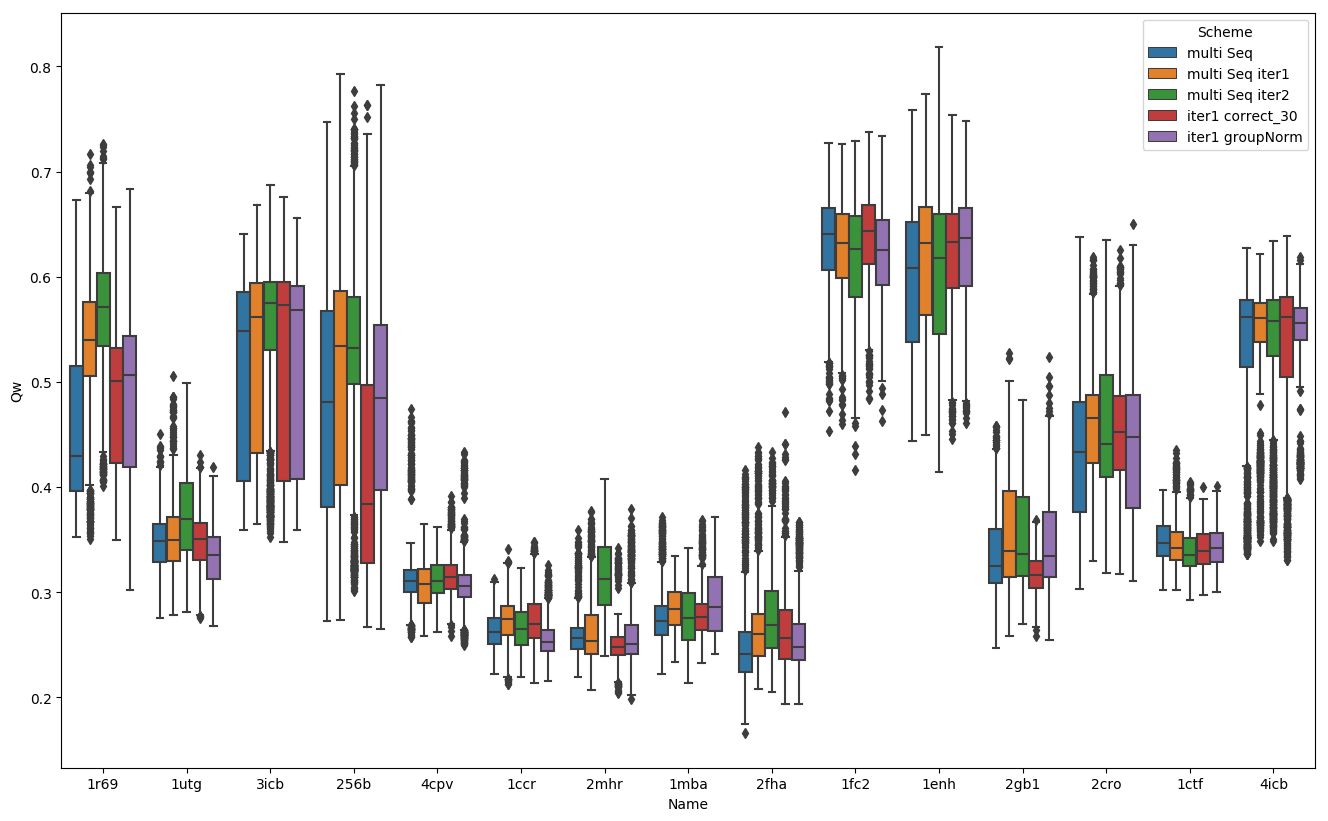

In [22]:
data_origin = pd.read_csv("/Users/weilu/Research/data/optimization/original_iterative_optimization_combined_train_set_with_frag_04-06.csv", index_col=0)

data = pd.read_csv("/Users/weilu/Research/data/optimization/iter0_iterative_optimization_combined_train_set_with_frag_04-08.csv", index_col=0)
data2 = pd.read_csv("/Users/weilu/Research/data/optimization/without_contact_iterative_optimization_combined_train_set_with_frag_04-09.csv", index_col=0)
data3 = pd.read_csv("/Users/weilu/Research/data/optimization/original_with_rg_iterative_optimization_combined_train_set_with_frag_04-09.csv", index_col=0)
data4 = pd.read_csv("/Users/weilu/Research/data/optimization/iter6_with_rg_iterative_optimization_combined_train_set_with_frag_04-09.csv", index_col=0)
data5 = pd.read_csv("/Users/weilu/Research/data/optimization/iter1_with_rg_iterative_optimization_combined_train_set_with_frag_04-10.csv", index_col=0)
data6 = pd.read_csv("/Users/weilu/Research/data/optimization/iter2_with_rg_iterative_optimization_combined_train_set_with_frag_04-11.csv", index_col=0)
data7 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_with_rg_iterative_optimization_combined_train_set_with_frag_04-12.csv", index_col=0)
data8 = pd.read_csv("/Users/weilu/Research/data/optimization/iter3_with_rg_less_frag_iterative_optimization_combined_train_set_with_frag_04-13.csv", index_col=0)
data9 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter0_iterative_optimization_combined_train_set_with_frag_04-15.csv", index_col=0)
data10 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter1_iterative_optimization_combined_train_set_with_frag_04-16.csv", index_col=0)
# data_origin_2 = pd.read_csv("/Users/weilu/Research/data/optimization/original_iterative_optimization_combined_train_set_04-01.csv", index_col=0)
data11 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter2_iterative_optimization_combined_train_set_with_frag_04-17.csv", index_col=0)
data12 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_groupedNorm_iterative_optimization_combined_train_set_with_frag_04-23.csv", index_col=0)
data13 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_groupedNorm_check_iterative_optimization_combined_train_set_with_frag_04-23.csv", index_col=0)
data14 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter1_correct_iterative_optimization_combined_train_set_with_frag_04-24.csv", index_col=0)
data15 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_iter1_correct_30_iterative_optimization_combined_train_set_with_frag_04-24.csv", index_col=0)
data16 = pd.read_csv("/Users/weilu/Research/data/optimization/multi_group_iter1_iterative_optimization_combined_train_set_with_frag_04-24.csv", index_col=0)



d = pd.concat([
                
#     data2.assign(Scheme="without contact"), 
    
#                 data.assign(Scheme="iter0"),         
                 
#                  data4.assign(Scheme="iter6"), 
#     data5.assign(Scheme="iter1"), 
    data9.assign(Scheme="multi Seq"), 
#     data3.assign(Scheme="original"),
#     data_origin.query("Rerun == 1").assign(Scheme="original 2"), 
#     data6.assign(Scheme="iter2"), 
    data10.assign(Scheme="multi Seq iter1"), 
    data11.assign(Scheme="multi Seq iter2"), 
#     data12.assign(Scheme="groupedNorm"),
#     data13.assign(Scheme="groupedNormCheck"),
#     data14.assign(Scheme="iter1 correct"),
    data15.assign(Scheme="iter1 correct_30"),
    data16.assign(Scheme="iter1 groupNorm"),
#     data7.assign(Scheme="iter3"), 
#     data8.assign(Scheme="iter3_less_frag"), 
    
#                 data4.query("Rerun == 1").assign(Scheme="iter7_90"), 
#                 data5.query("Rerun == 1").assign(Scheme="iter3_90"), 
#     data6.query("Rerun == 1").assign(Scheme="iter4"), 
#     data7.query("Rerun == 1").assign(Scheme="iter5"), 
              ])
sns.boxplot("Name", "Qw", hue="Scheme", data=d)
# sns.boxplot("Qw", "Name", hue="Scheme", data=d)


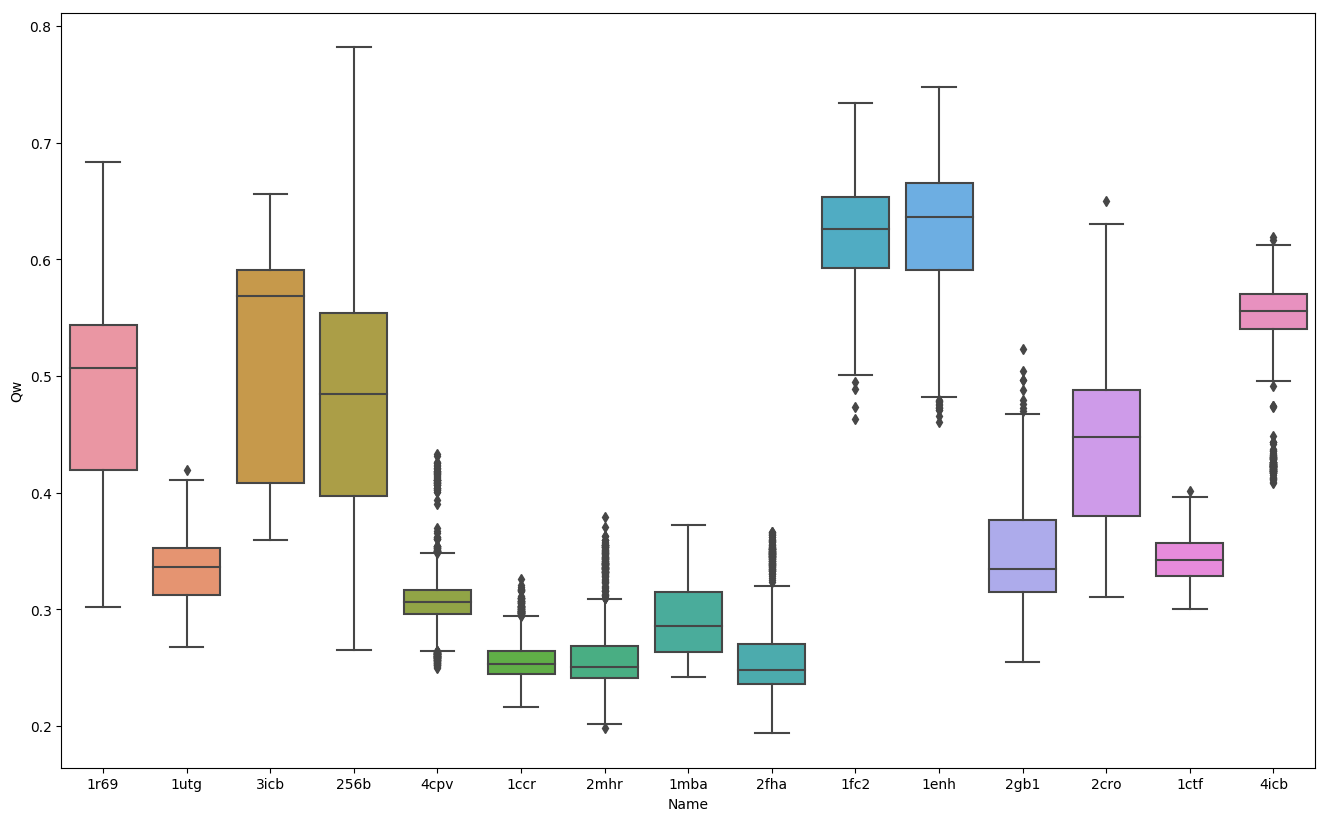

In [18]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "multi_group_iter1"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

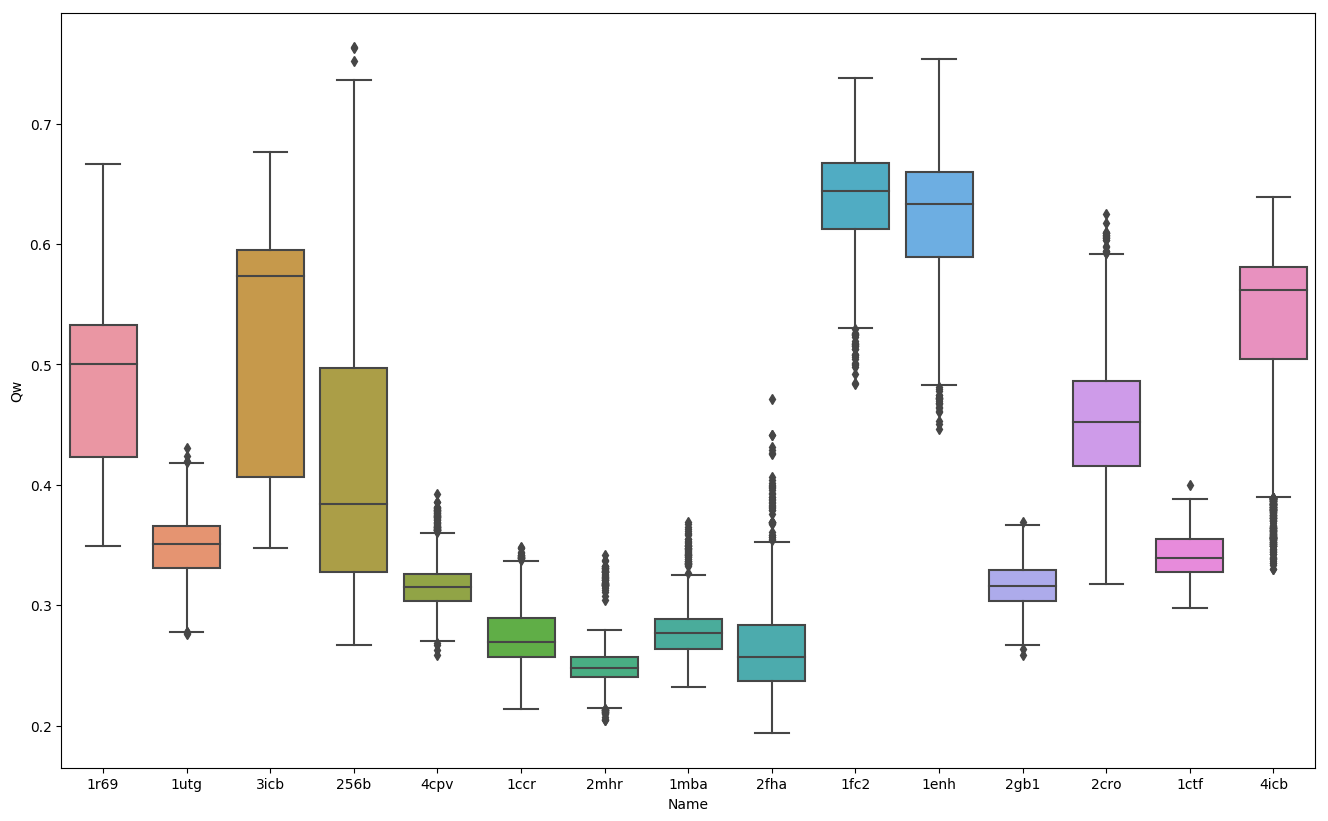

In [15]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "multi_iter1_correct_30"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

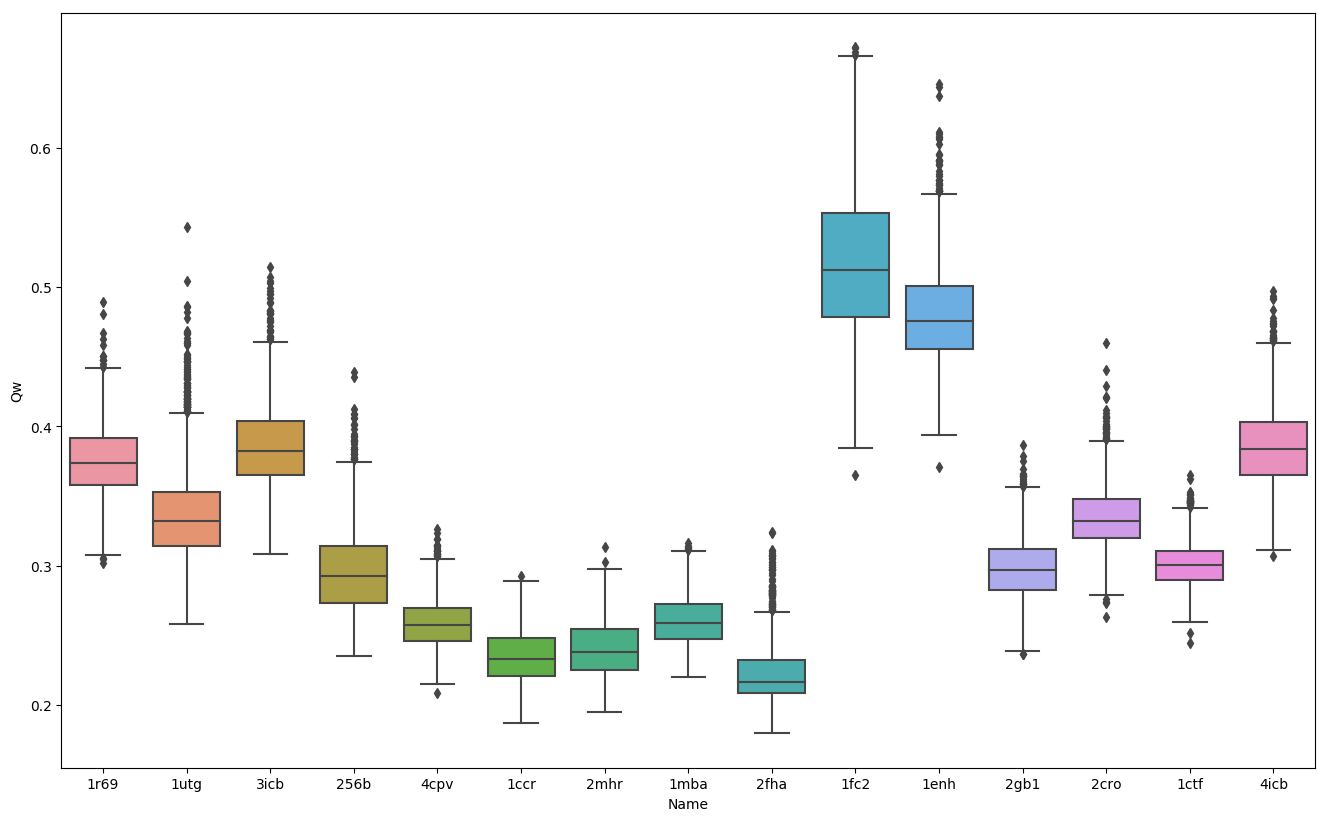

In [9]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "multi_iter1_correct"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

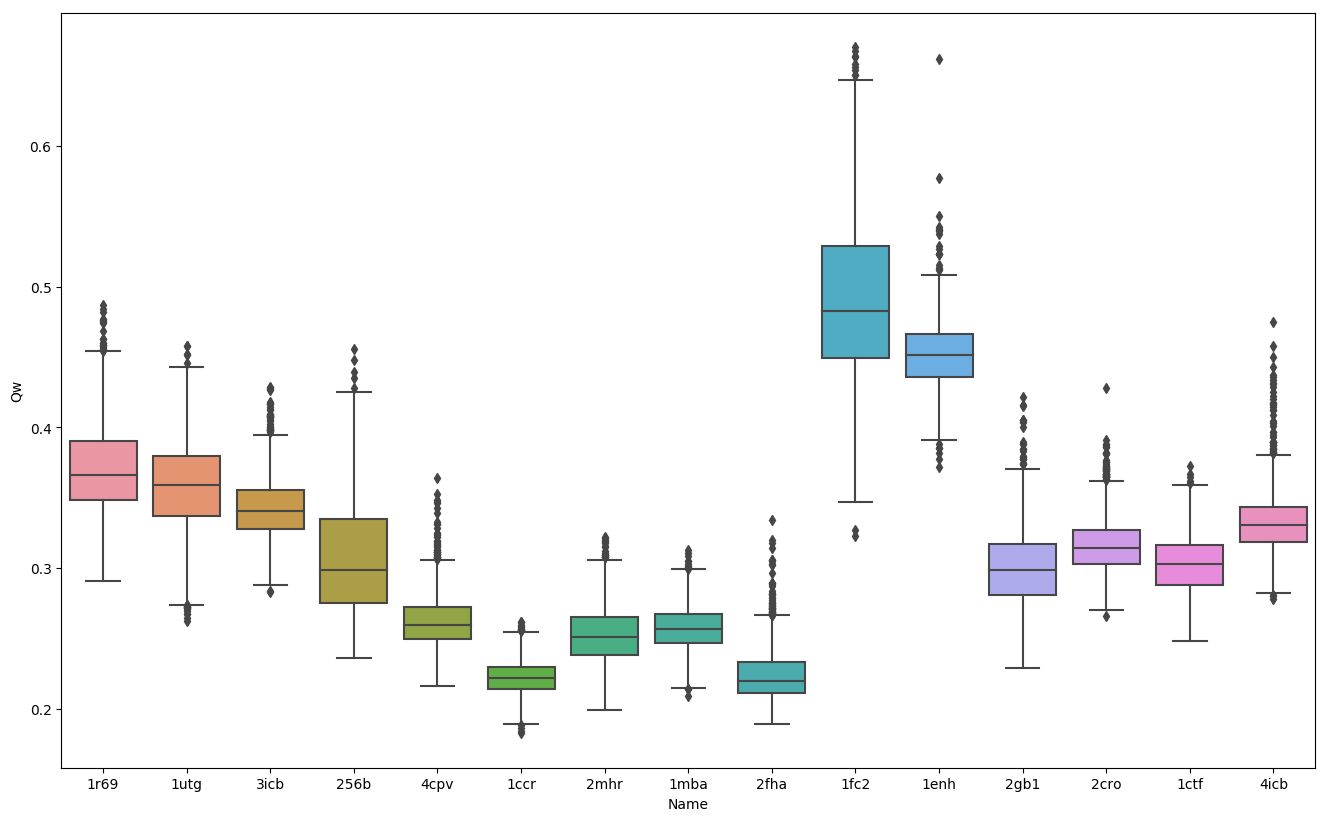

In [7]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "multi_groupedNorm_check"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

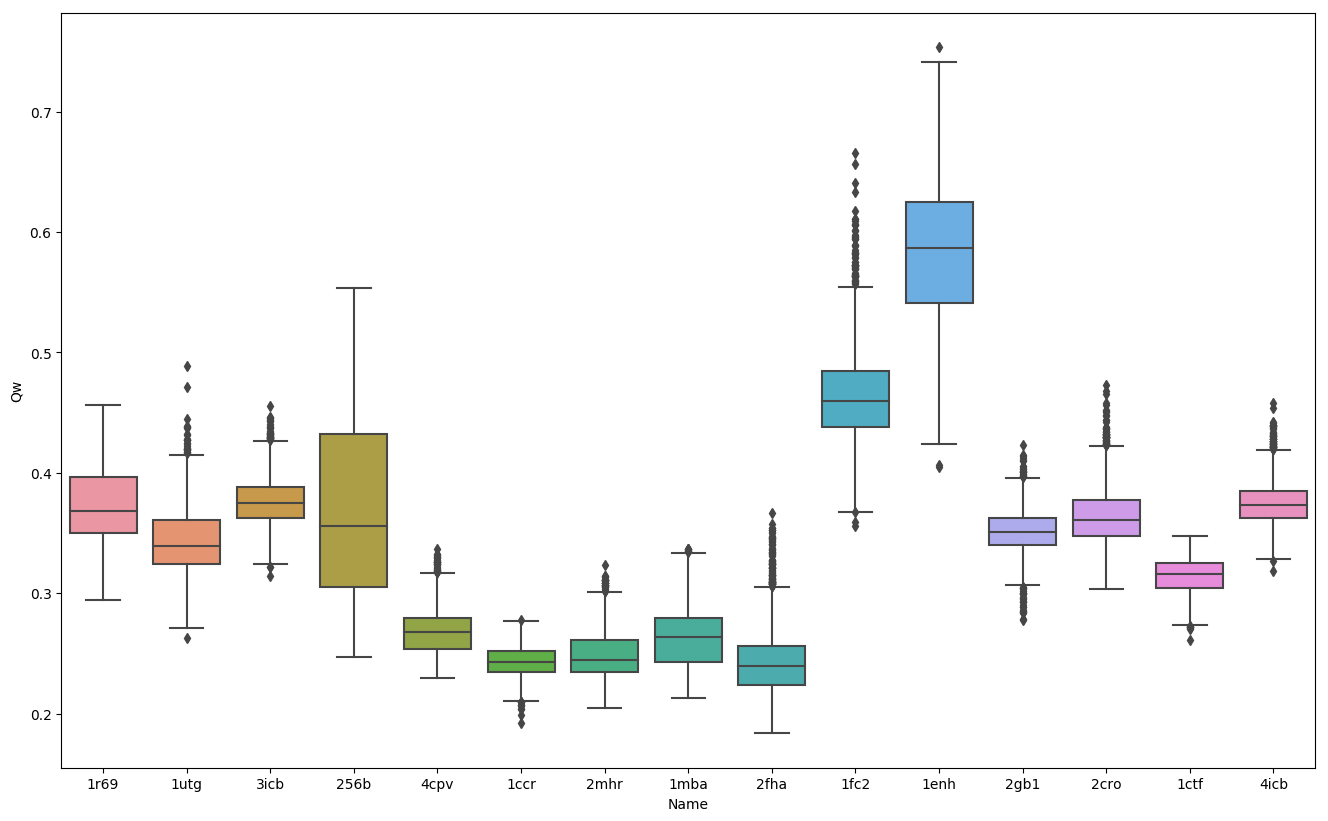

In [5]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "multi_groupedNorm"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

[Errno 2] File b'/Users/weilu/Research/server/april_2019/iterative_optimization_combined_train_set_with_frag/multi_iter2/3icb/simulation/6/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_2019/iterative_optimization_combined_train_set_with_frag/multi_iter2/3icb/simulation/6/0/wham.dat'
[Errno 2] File b'/Users/weilu/Research/server/april_2019/iterative_optimization_combined_train_set_with_frag/multi_iter2/2gb1/simulation/4/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_2019/iterative_optimization_combined_train_set_with_frag/multi_iter2/2gb1/simulation/4/0/wham.dat'


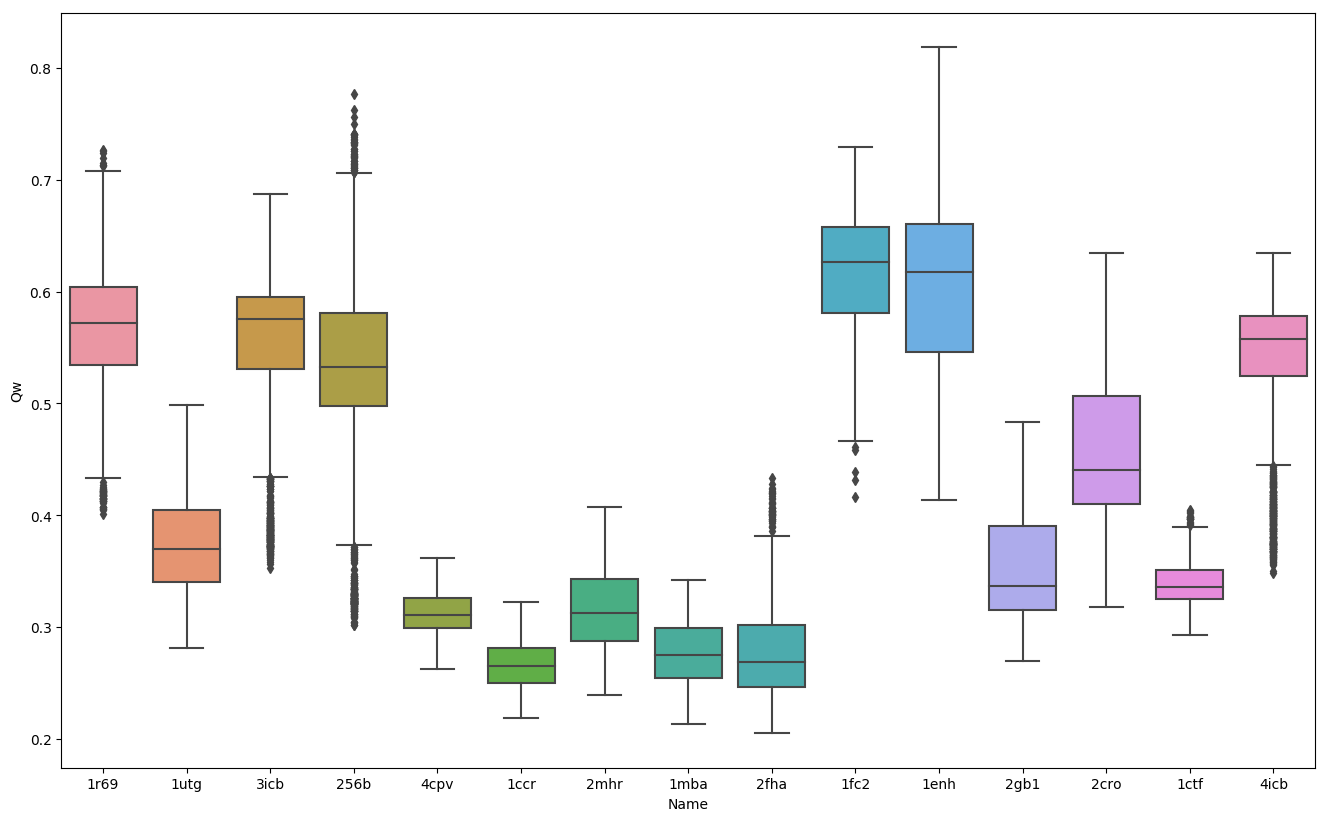

In [29]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "multi_iter2"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

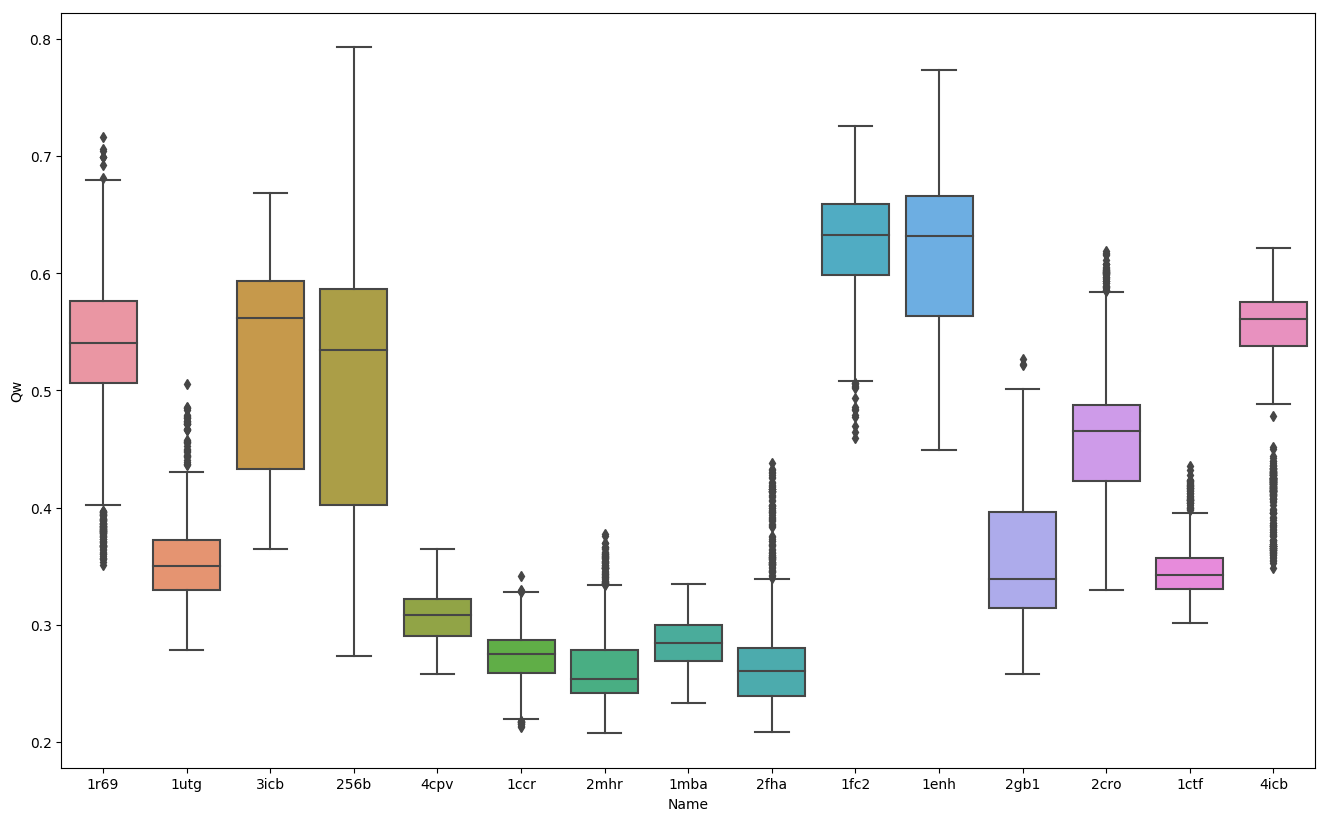

In [19]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "multi_iter1"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

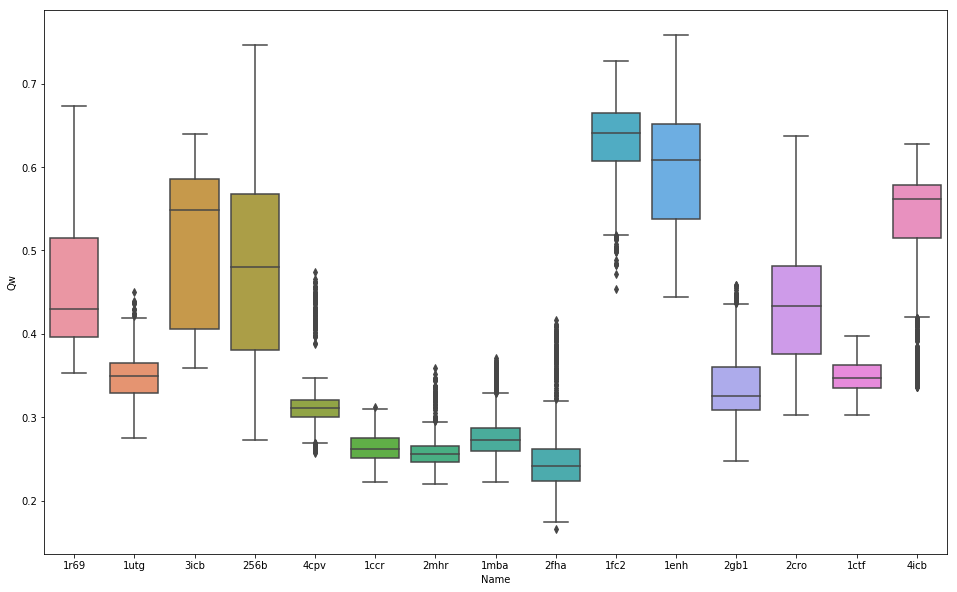

In [4]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "multi_iter0"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

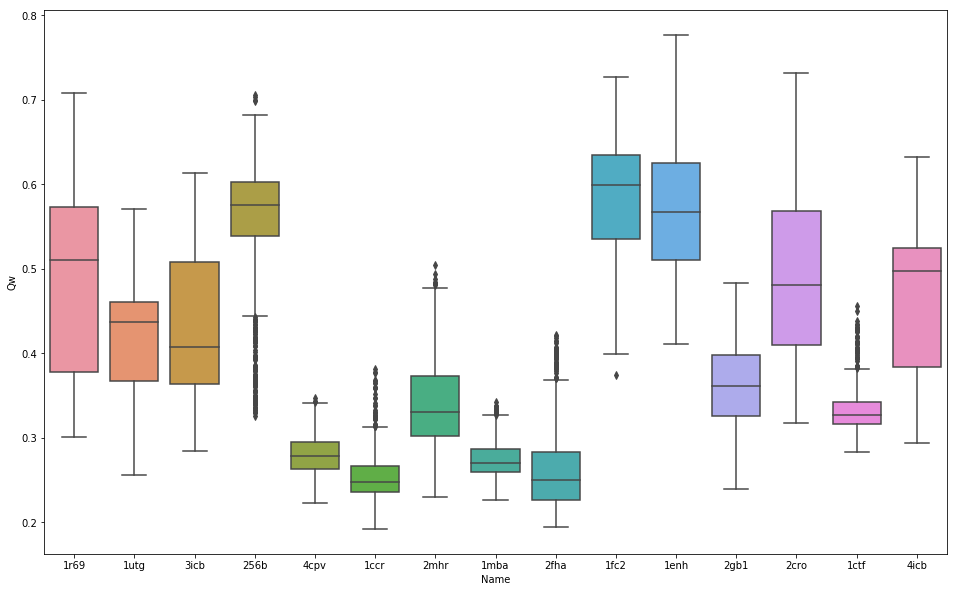

In [37]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "iter3_with_rg_less_frag"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

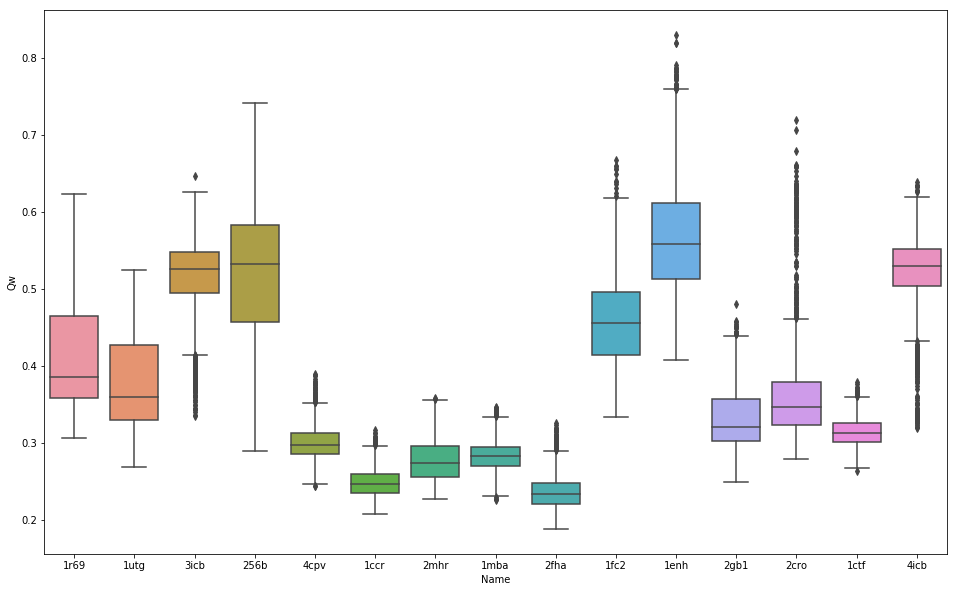

In [32]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "iter2_with_rg_90"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

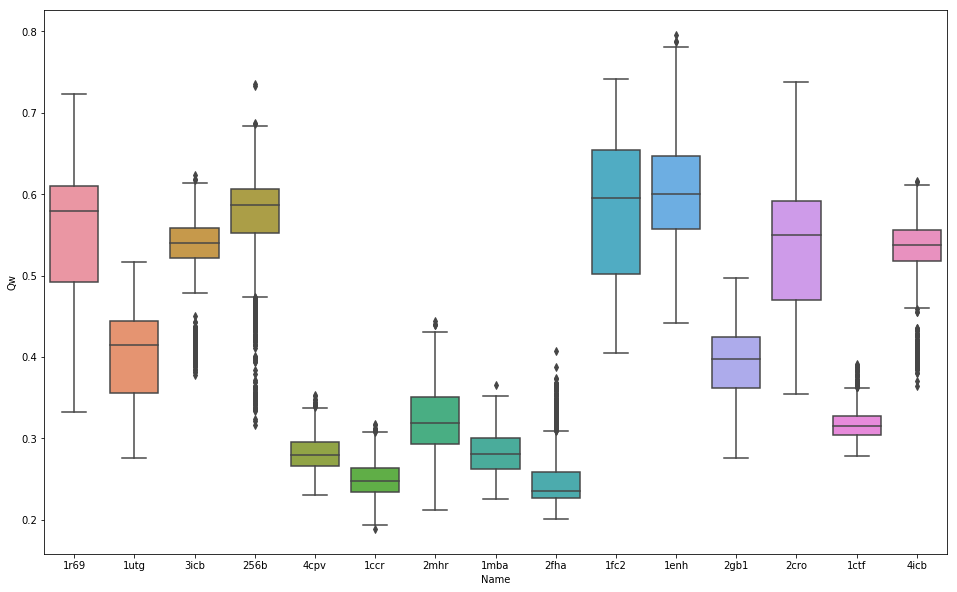

In [30]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "iter3_with_rg"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

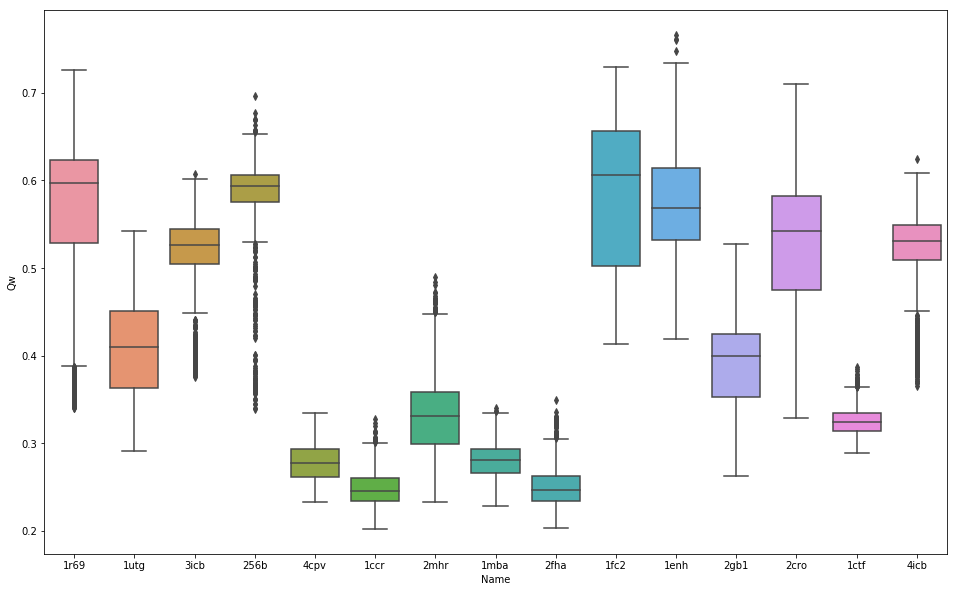

In [27]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "iter2_with_rg"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

[Errno 2] File b'/Users/weilu/Research/server/april_2019/iterative_optimization_combined_train_set_with_frag/iter1_with_rg/1enh/simulation/16/0/wham.dat' does not exist: b'/Users/weilu/Research/server/april_2019/iterative_optimization_combined_train_set_with_frag/iter1_with_rg/1enh/simulation/16/0/wham.dat'


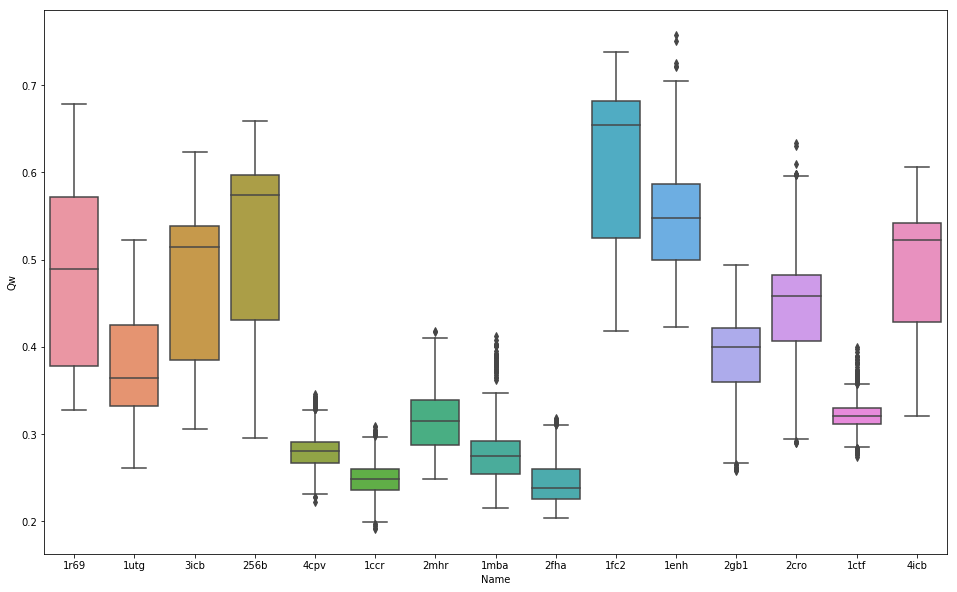

In [12]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "iter1_with_rg"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

In [ ]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "iterative_optimization_combined_train_set_with_frag"
pre = pre + folder + "/"
simulationType = "iter6_with_rg"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = dataset["combined"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=30, rerun=1, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
sns.boxplot("Name", "Qw", data=data)

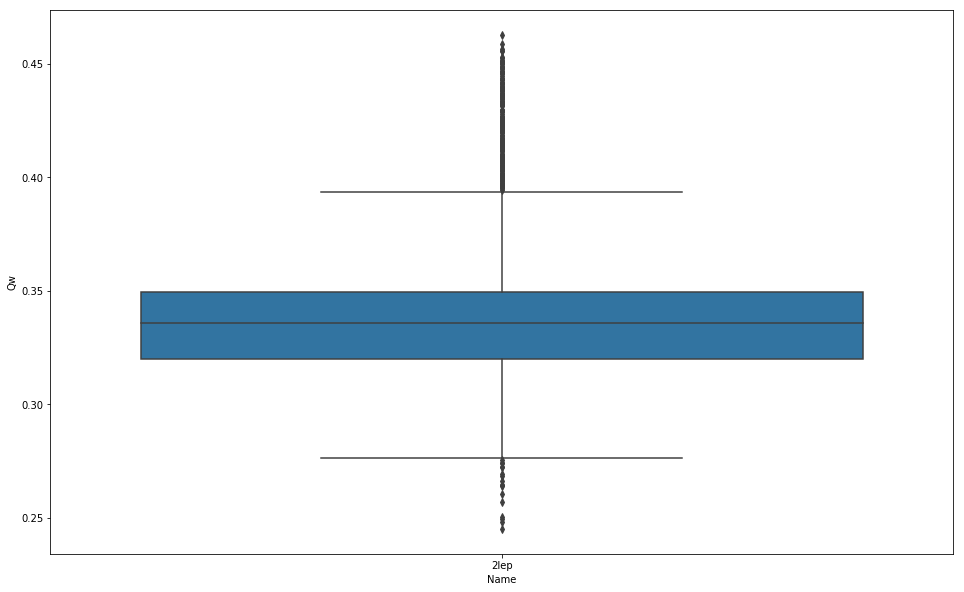

In [10]:
pre = "/Users/weilu/Research/server/april_2019/"
folder = "globular_2xov_named_2lep"
pre = pre + folder + "/"
simulationType = "longerRun"
today = datetime.datetime.today().strftime('%m-%d')
# pdb_list, steps = dataset["test"]
pdb_list = ["2lep"]
# pdb_list = "1FC2C, 1ENH, 2GB1, 2CRO, 1CTF, 4ICB".split(", ")
data = get_data(pre, pdb_list, simType=simulationType, n_rum=20, rerun=2, formatName=True)
data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/{simulationType}_{folder}_{today}.csv")
# data.reset_index(drop=True).to_csv(f"/Users/weilu/Research/data/optimization/withoutContact_{today}.csv")
# sns.boxplot("Name", "Qw", data=data)

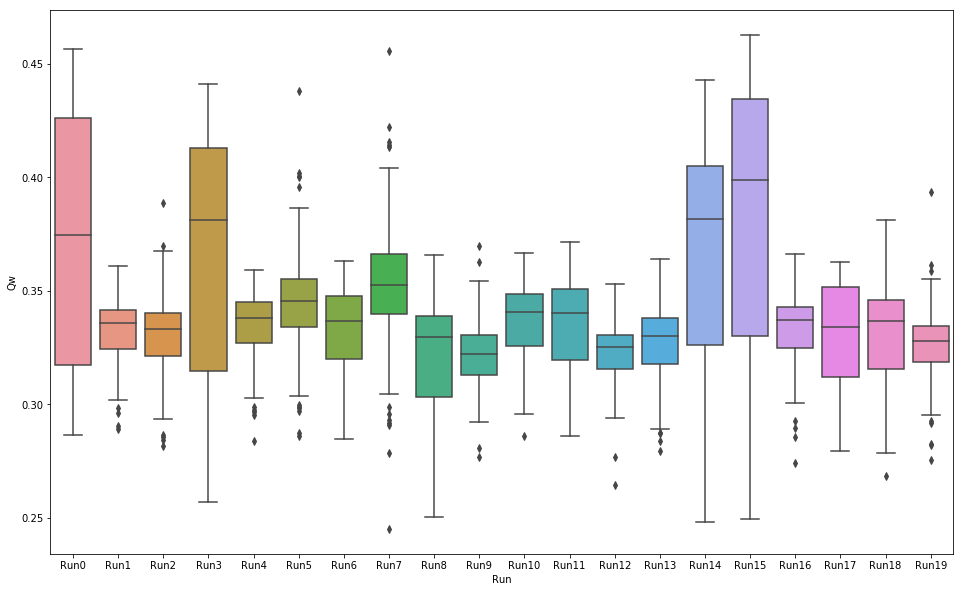

In [11]:
sns.boxplot("Run", "Qw", data=data)